Loading the dataset. The first is for training. The other is for validation:

In [2]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
  '../dataset/training_set/training_set/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  '../dataset/training_set/training_set/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

class_names = train_ds.class_names
print(class_names)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
['cats', 'dogs']


Visualisation of the images to better know what the dataset includes:

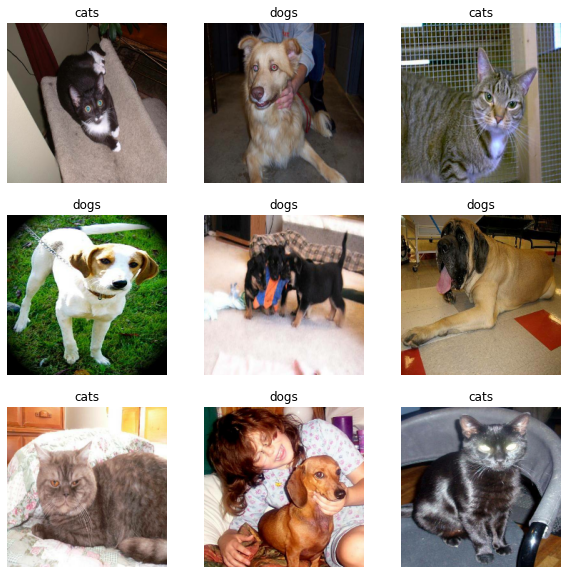

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Finding a model architecture and  fitting the data. An implementation of Tensorboard is also used:

In [4]:
num_classes = 2
MODEL_NAME = 'DogsVsCats_v3_resnet2'

# Imports that are nice to know about
"""
import os
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
"""

from tensorflow.keras.optimizers import SGD

model = tf.keras.applications.resnet50.ResNet50(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=(224, 224, 3), pooling=None, classes=1000
)

tfboard = tf.keras.callbacks.TensorBoard(
log_dir='logs/{}'.format(MODEL_NAME), histogram_freq=0, write_graph=True,
write_images=False, write_steps_per_second=False, update_freq='epoch',
profile_batch=2, embeddings_freq=0, embeddings_metadata=None,
)

model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.8, decay=1e-6), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=2,
  callbacks=[tfboard]
)

c:\other\github\applications\alone\picturio\picturio\venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/2
201/201 [==============================] - 54s 223ms/step - loss: 0.5349 - accuracy: 0.9016 - val_loss: 0.0685 - val_accuracy: 0.9688

Printing out a summary of the model. Note that each of the layers that ResNet50 are using will be showed here:

In [5]:
model.summary()



Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________